In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
%matplotlib inline

In [2]:
plt.style.use('default') 
plt.rc('font',  size=9) 
plt.rc('figure', figsize=(4,3), dpi=150) 

In [91]:
df = pd.read_csv('all-states-history.csv')
df.tail()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
20439,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20440,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20441,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20442,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20443,2020-01-13,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [92]:
df['date'] = pd.to_datetime(df['date'].astype(str))
df = df.loc[(df['date'] >= '03/07/2020') & (df['date'] <= '02/25/2021')]
df.tail()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
20110,2020-03-07,VT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,17.0,7,NaN,NaN,NaN,NaN,NaN,0,17.0,7
20111,2020-03-07,WA,27.0,NaN,1,NaN,NaN,NaN,NaN,0,...,2092.0,425,NaN,NaN,NaN,NaN,2007.0,403,NaN,0
20112,2020-03-07,WI,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,31.0,10,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20113,2020-03-07,WV,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,2.0,1,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20114,2020-03-07,WY,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,8.0,0,NaN,NaN,NaN,NaN,NaN,0,8.0,0


In [93]:
geomap = pd.read_csv('GeoIDs - State.csv')
geomap.head()
geodict = {}
for i in range(len(geomap)):
    geodict[geomap.iloc[i,2]] = (geomap.iloc[i,0])

In [94]:
df = df.loc[~df.state.isin(['AS', 'GU', 'MP', 'PR', 'VI'])]
df.rename(columns={'state':'statefips'}, inplace=True)

In [95]:
df['statefips'] = df['statefips'].apply(lambda x: geodict[x])

In [96]:
df = df.sort_values(by='date')
df.index = list(range(len(df)))

In [97]:
df = df[['date', 'statefips', 'hospitalizedIncrease', 'positiveIncrease', 'deathIncrease', 'totalTestEncountersViralIncrease', 'totalTestResultsIncrease', 'totalTestsPeopleViralIncrease', 'totalTestsViralIncrease']]

In [87]:
df.to_csv('states_unstacked_full_cleaner.csv')

In [90]:
df

,date,statefips,hospitalizedIncrease,positiveIncrease,deathIncrease,totalTestEncountersViralIncrease,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
0,2020-03-07,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-07,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-07,24,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,2020-03-07,25,0.000000,0.000000,0.000000,0.0,33.333333,0.000000,33.333333
4,2020-03-07,22,0.000000,0.000000,0.000000,0.0,33.333333,0.000000,33.333333
...,...,...,...,...,...,...,...,...,...
18151,2021-02-25,31,72.333333,1403.666667,28.333333,0.0,25566.333333,1087.000000,25369.666667
18152,2021-02-25,38,10.333333,241.333333,5.333333,1246.0,10970.000000,1226.333333,11443.000000
18153,2021-02-25,37,8.666667,1255.000000,24.333333,1246.0,26017.333333,622.666667,26189.333333
18154,2021-02-25,28,1.000000,1453.666667,24.000000,1246.0,22324.000000,139.333333,22189.333333


In [8]:
col_names = ['date', 'state', 'deathIncrease', 'hospitalizedIncrease', 'inIcuCumulative', 'positiveIncrease', 'positiveCasesViral', 'totalTestsPeopleViralIncrease', 'totalTestEncountersViralIncrease', 'totalTestsPeopleViralIncrease']

In [9]:
df = df[col_names]

In [10]:
df.head()

,date,state,deathIncrease,hospitalizedIncrease,inIcuCumulative,positiveIncrease,positiveCasesViral,totalTestsPeopleViralIncrease,totalTestEncountersViralIncrease,totalTestsPeopleViralIncrease
0,2021-03-01,AK,10,2,NaN,350,NaN,0,0,0
1,2021-03-01,AL,2,220,2651.0,517,386933.0,1858,0,1858
2,2021-03-01,AR,7,0,NaN,94,254128.0,0,0,0
3,2021-03-01,AS,0,0,NaN,0,NaN,0,0,0
4,2021-03-01,AZ,-1,-10,NaN,1039,762652.0,6365,0,6365


In [11]:
df.isnull().sum(axis = 0)

date                                    0
state                                   0
deathIncrease                           0
hospitalizedIncrease                    0
inIcuCumulative                     16687
positiveIncrease                        0
positiveCasesViral                   6663
totalTestsPeopleViralIncrease           0
totalTestEncountersViralIncrease        0
totalTestsPeopleViralIncrease           0
dtype: int64

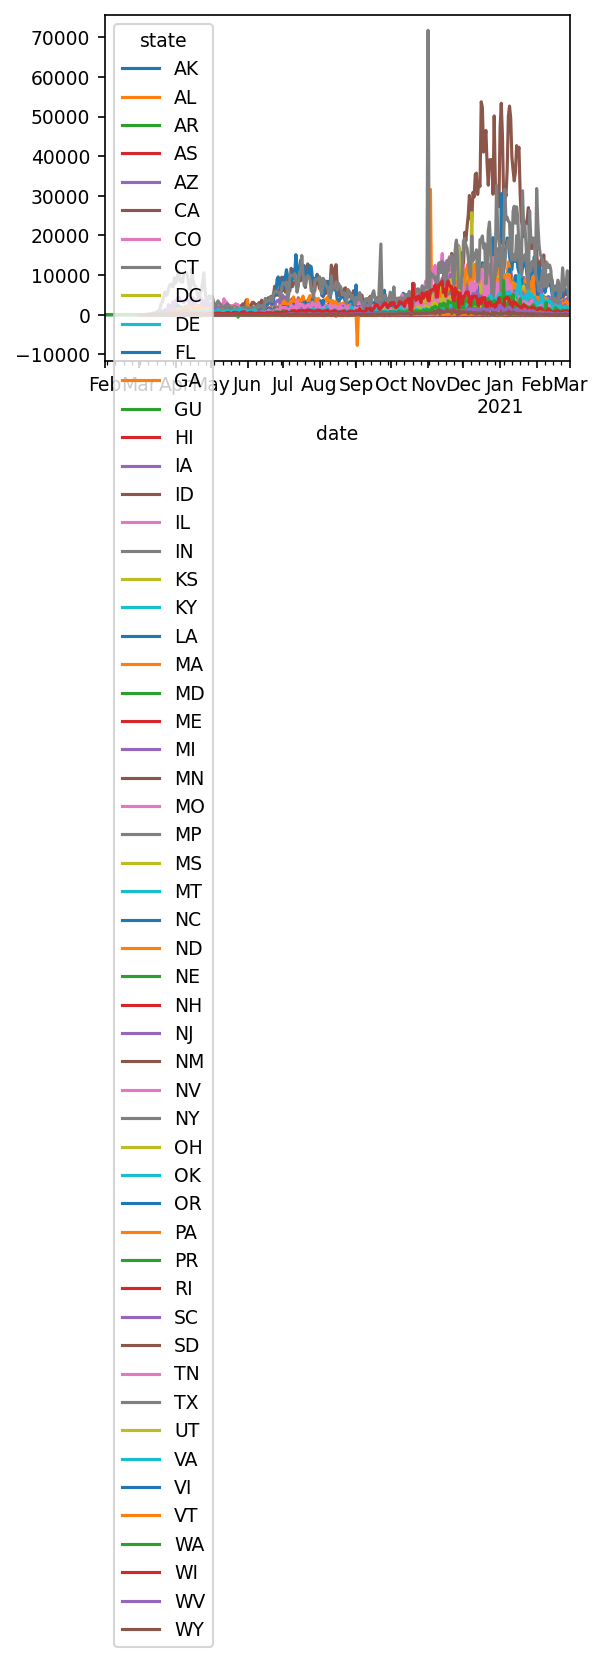

In [25]:
df.groupby(['date', 'state'])['positiveIncrease'].mean().unstack().plot()
plt.show()

In [26]:
df_positiveIncrease = df.groupby(['date', 'state'])['positiveIncrease'].mean().unstack()
df_positiveIncrease.to_csv('../US_States/ProcessedData/us_positiveIncrease.csv')

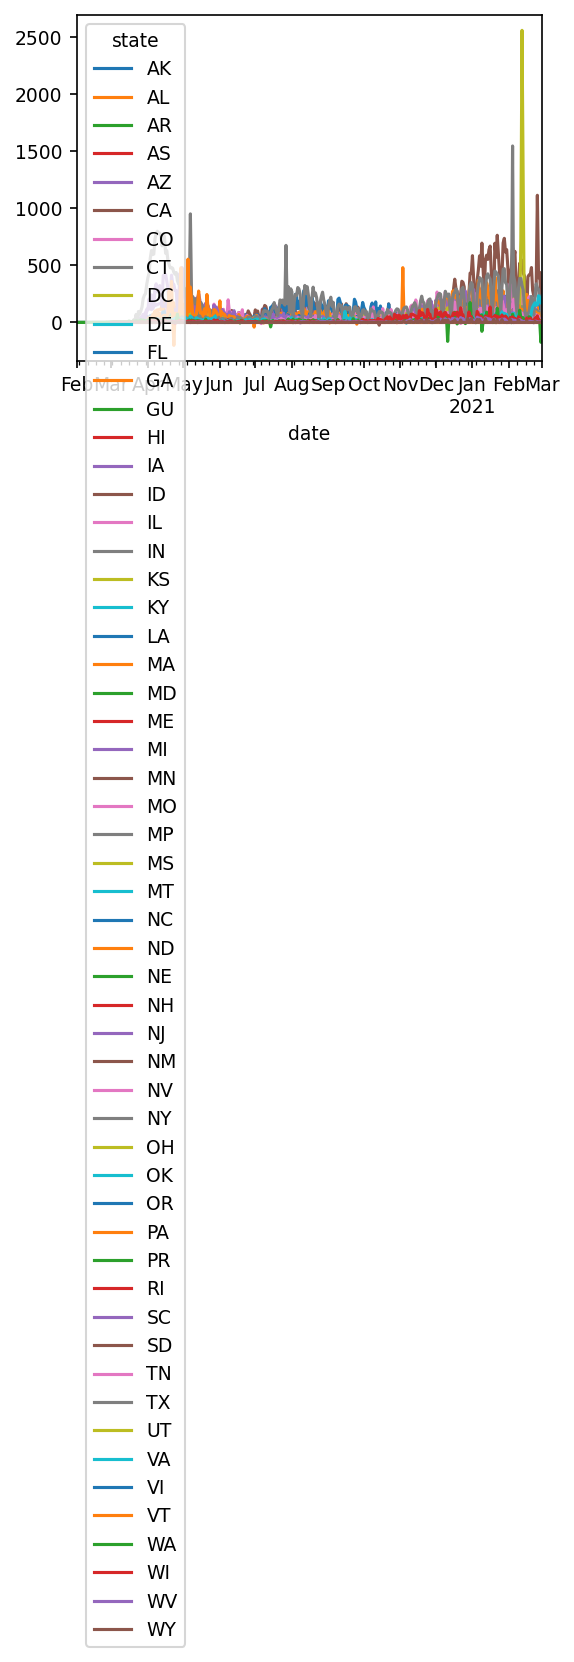

In [27]:
df.groupby(['date', 'state'])['deathIncrease'].mean().unstack().plot()
plt.show()

In [28]:
df_deathIncrease = df.groupby(['date', 'state'])['deathIncrease'].mean().unstack()
df_deathIncrease.to_csv('../US_States/ProcessedData/us_deathIncrease.csv')

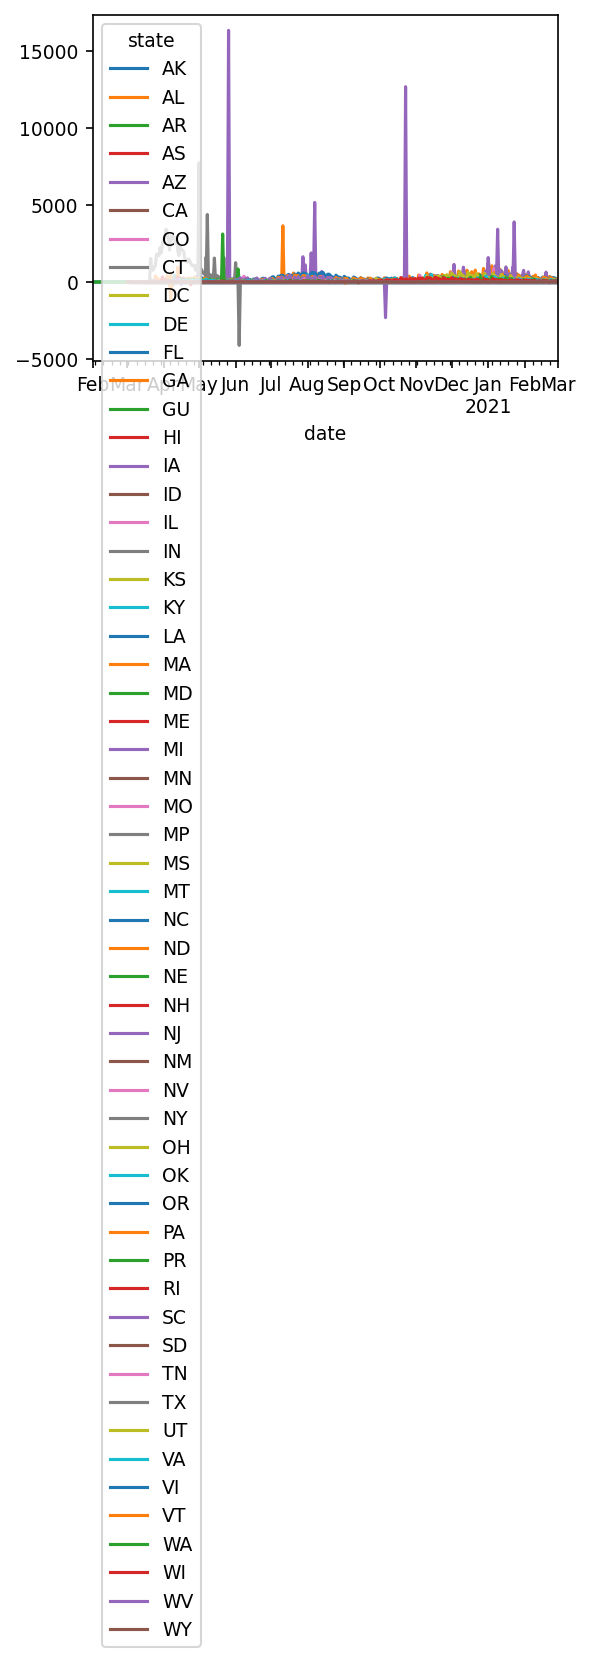

In [29]:
df.groupby(['date', 'state'])['hospitalizedIncrease'].mean().unstack().plot()
plt.show()

In [39]:
df_hospitalizedIncrease = df.groupby(['date', 'state'])['hospitalizedIncrease'].mean().unstack()
df_hospitalizedIncrease.to_csv('../US_States/ProcessedData/us_hospitalizedIncrease.csv')

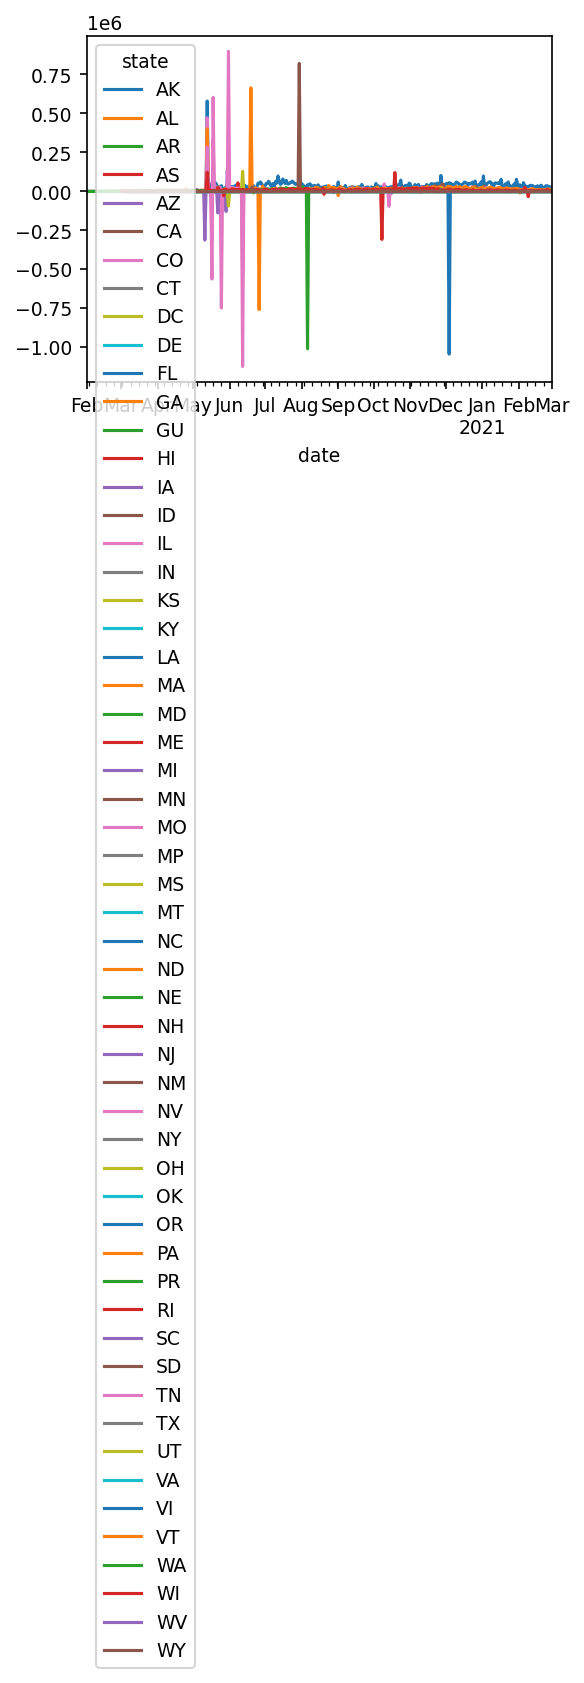

In [40]:
df.groupby(['date', 'state'])['totalTestsPeopleViralIncrease'].mean().unstack().plot()
plt.show()

In [41]:
df_totalTestsPeopleViralIncrease = df.groupby(['date', 'state'])['totalTestsPeopleViralIncrease'].mean().unstack()
df_totalTestsPeopleViralIncrease.to_csv('../US_States/ProcessedData/us_totalTestsPeopleViralIncrease.csv')

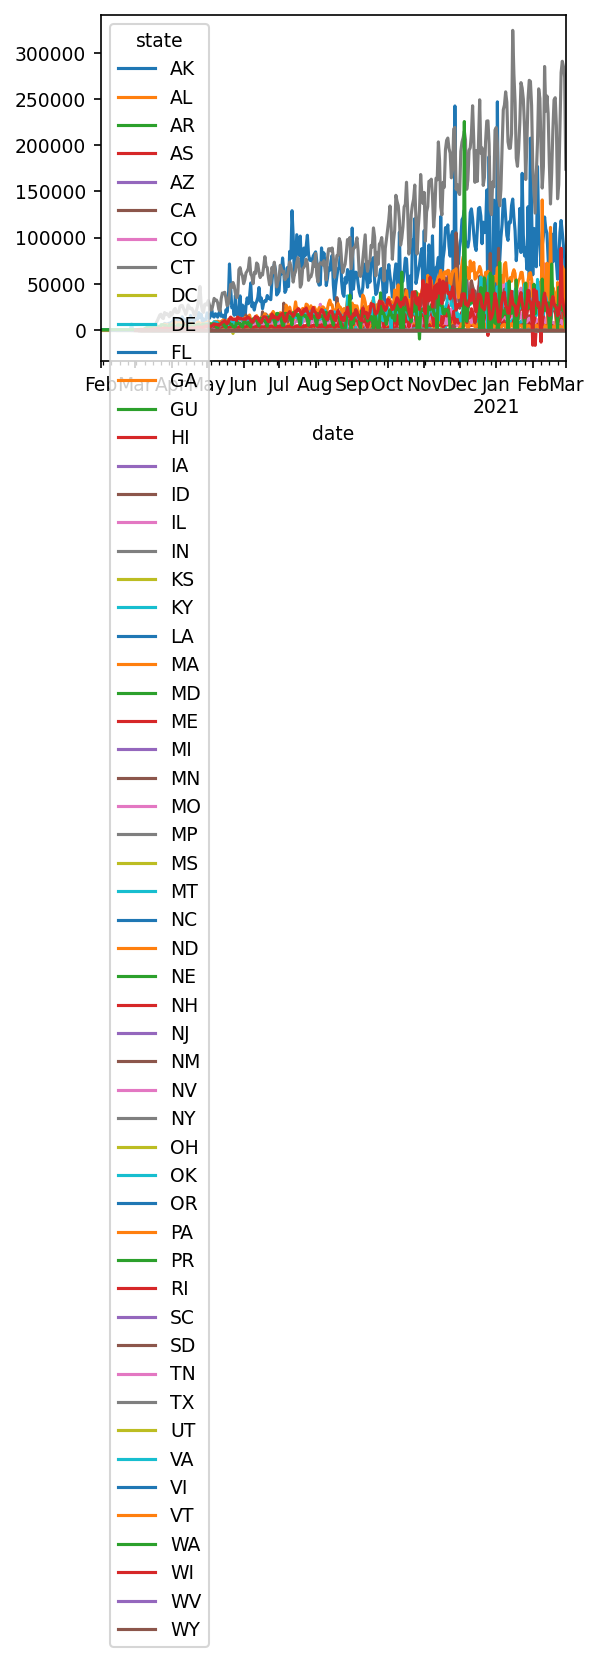

In [12]:
df.groupby(['date', 'state'])['totalTestEncountersViralIncrease'].mean().unstack().plot()
plt.show()